Importando librerias

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Cargando la Data


In [2]:
 data = pd.read_excel('listado_compras.xlsx', header=2 )

- Convirtiendo la Columna Fecha en valores de Tiempo y Hora
-  errors='coerce' los valores que no se puedan convertir ponelo como NA



In [3]:
data['FECHA'] = pd.to_datetime(data['FECHA'], errors='coerce')

Conocer si la Columna Fecha sus atributos son valores temporales

In [4]:
print(data['FECHA'].dtype)

datetime64[ns]


Estableciendo fechas Inicio y Fin

In [5]:
fecha_inicio = datetime.strptime('2025-06-01', '%Y-%m-%d')
fecha_fin = datetime.strptime('2025-06-30', '%Y-%m-%d')

Establecer el rango de fechas que deseo utilizando la funcion "between"

In [6]:
data = data[data['FECHA'].between(fecha_inicio, fecha_fin)]

Seleccionando la Data Relevante

In [7]:
df = data[['FECHA', 'TOTAL', 'GLOSA']]

Conocer los valores de "Glosa"

In [8]:
data['GLOSA'].unique()

array(['ENVIO', 'HONORARIOS', 'FERRETERIA', 'PEAJE', 'COMBUSTIBLE',
       'ESTACIONAMIENTO', 'REFRIGERANTE', 'ALIMENTACION', 'SCTR',
       'GASEOSA', 'LIMPIEZA', 'AUTOPARTES', 'ILUMINACION', 'OFICINA',
       'FINANZAS', 'PLAFON', 'LLANTERIA', 'ZAPATO', 'AGUA', 'LLANTA',
       'SUSCRIPCION', 'PINTURA', 'SEGURO', 'EXAMEN', 'PAPELERIA',
       'FACTURACION', 'VEHICULO', 'BATERÃ\x8dA', 'INTERNET'], dtype=object)

Corrigiendo el valor 'BATERÃ\x8dA' por BATERIA

In [9]:
df = df.copy()
df['GLOSA'] = df['GLOSA'].replace('BATERÃ\x8dA', 'BATERIA')

&nbsp;  

# Segmentando la data
🚗 Transporte/Vehículo

COMBUSTIBLE,
PEAJE,
LLANTA,
LLANTERIA,
VEHICULO,
BATERIA,
AUTOPARTES,
ILUMINACION,
ESTACIONAMIENTO,
REFRIGERANTE.

🏢 Oficina

OFICINA,
PAPELERIA.

👷‍♂️ Seguridad / Personal

SCTR,
SEGURO,
EXAMEN,
ZAPATO.

🧰 Mantenimiento/Ferretería

FERRETERIA,
LIMPIEZA,
PINTURA,
PLAFON.

🍽️ Alimentación/Bebidas

ALIMENTACION,
GASEOSA,
AGUA.

💼 Servicios/Profesionales

HONORARIOS,
ENVIO,
FACTURACION,
SUSCRIPCION,
INTERNET,
FINANZAS.

Renombrando para la manipulacion de datos

In [10]:
df['GLOSA'] = df['GLOSA'].replace(['COMBUSTIBLE','PEAJE','LLANTA','LLANTERIA','VEHICULO','BATERIA','AUTOPARTES','ILUMINACION','ESTACIONAMIENTO','REFRIGERANTE'],'TRANSPORTE/VEHICULO')
df['GLOSA'] = df['GLOSA'].replace(['OFICINA','PAPELERIA'],'OFICINA')
df['GLOSA'] = df['GLOSA'].replace(['SCTR','SEGURO','EXAMEN','ZAPATO'],'SEGURIDAD/PERSONAL')
df['GLOSA'] = df['GLOSA'].replace(['FERRETERIA','LIMPIEZA','PINTURA','PLAFON'],'MANTENIMIENTO/FERRETERIA')
df['GLOSA'] = df['GLOSA'].replace(['ALIMENTACION','GASEOSA','AGUA'],'ALIMENTACION/BEBIDAS')
df['GLOSA'] = df['GLOSA'].replace(['HONORARIOS','ENVIO','FACTURACION','SUSCRIPCION','INTERNET','FINANZAS'],'SERVICIOS/PROFESIONALES')


Agrupando Glosa Y Total

In [11]:
data1 = df.groupby('GLOSA')['TOTAL'].sum().reset_index()

Paleta de Colores Viridis

In [12]:
colores = cm.viridis(np.linspace(0, 1, len(data1)))

Visualizacion de Datos

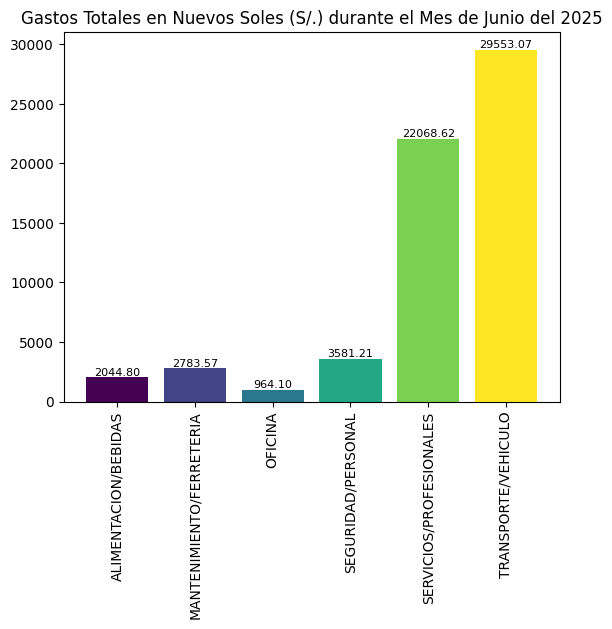

In [13]:
bars = plt.bar(data1['GLOSA'], data1['TOTAL'], color=colores)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=8)
    plt.title("Gastos Totales en Nuevos Soles (S/.) durante el Mes de Junio del 2025")

from matplotlib.patches import Patch

plt.xticks(rotation=90)
plt.show()